In [1]:
from skimage import io
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [2]:
ic = io.imread_collection('E:/Landsat8/*.tif')
images = []
shape1 = ic[0].shape

In [3]:
shape1

(998, 998)

In [4]:
shape2 = ic[1].shape
shape3 = ic[2].shape
shape4 = ic[3].shape
shape5 = ic[4].shape
shape6 = ic[5].shape

In [5]:
for i in range(len(ic)):
    images.append(ic[i].flatten())

In [6]:
images

[array([-64, -71, -76, ..., 305, 185,  70], dtype=int16),
 array([386, 402, 378, ..., 703, 544, 452], dtype=int16),
 array([3311, 3527, 3537, ..., 2986, 2712, 2843], dtype=int16),
 array([163, 166, 150, ..., 685, 501, 342], dtype=int16),
 array([1695, 1710, 1712, ..., 1730, 1449, 1276], dtype=int16),
 array([ 844,  837,  830, ..., 1042,  836,  668], dtype=int16)]

In [7]:
pca = PCA()
pca.fit(images)

PCA()

In [8]:
print(pca.components_.shape)

(6, 996004)


In [9]:
pca.explained_variance_

array([7.73838016e+11, 1.22801335e+10, 3.80525360e+09, 6.44331526e+08,
       2.04341185e+08, 1.45283375e-18])

In [10]:
pca.mean_

array([1055.83333333, 1095.16666667, 1088.5       , ..., 1241.83333333,
       1037.83333333,  941.83333333])

In [11]:
pc1 = pca.components_[0].reshape(shape1)
pc2 = pca.components_[1].reshape(shape1)
pc3 = pca.components_[2].reshape(shape1)
pc4 = pca.components_[3].reshape(shape1)
pc5 = pca.components_[4].reshape(shape1)
pc6 = pca.components_[5].reshape(shape1)

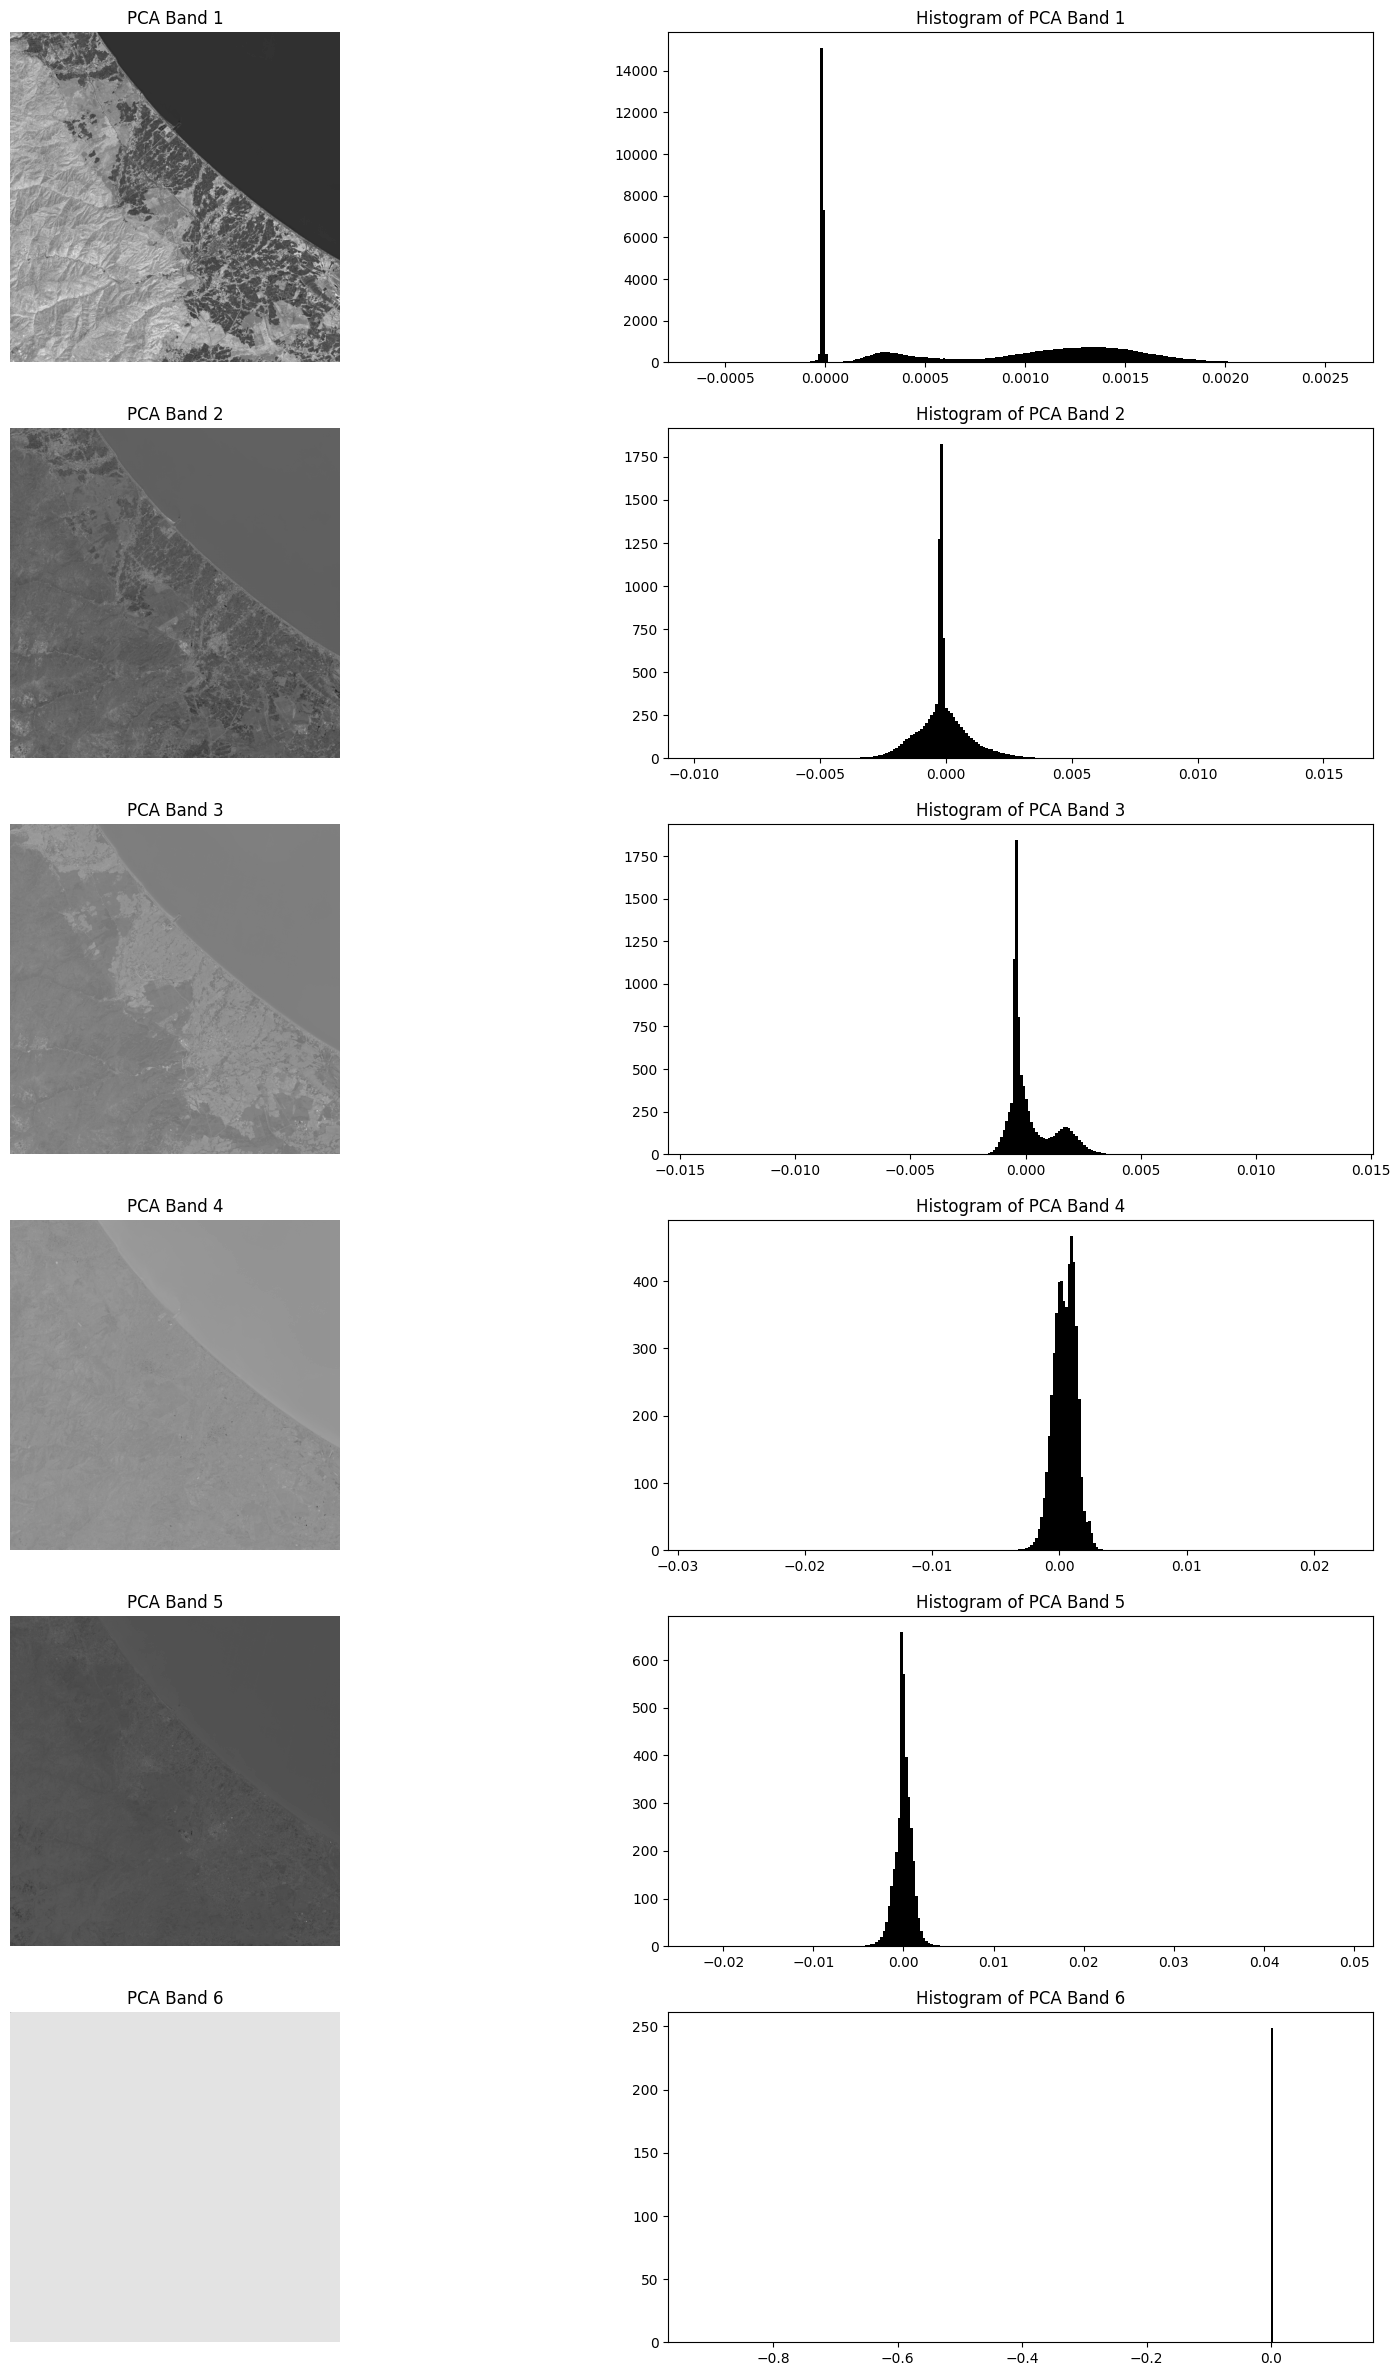

In [12]:
fig , ax = plt.subplots(nrows=6 , ncols=2, figsize=(20,30))
ax[0,0].imshow(pc1, cmap='gray')
ax[0,0].set_title('PCA Band 1')
ax[0,0].axis('off')
ax[0,1].hist(pc1.ravel(), bins=256, density=True, histtype='bar', color='black')
ax[0,1].set_title('Histogram of PCA Band 1')
#########################
ax[1,0].imshow(pc2, cmap='gray')
ax[1,0].set_title('PCA Band 2')
ax[1,0].axis('off')
ax[1,1].hist(pc2.ravel(), bins=256, density=True, histtype='bar', color='black')
ax[1,1].set_title('Histogram of PCA Band 2')
##########################
ax[2,0].imshow(pc3, cmap='gray')
ax[2,0].set_title('PCA Band 3')
ax[2,0].axis('off')
ax[2,1].hist(pc3.ravel(), bins=256, density=True, histtype='bar', color='black')
ax[2,1].set_title('Histogram of PCA Band 3')
##########################
ax[3,0].imshow(pc4, cmap='gray')
ax[3,0].set_title('PCA Band 4')
ax[3,0].axis('off')
ax[3,1].hist(pc4.ravel(), bins=256, density=True, histtype='bar', color='black')
ax[3,1].set_title('Histogram of PCA Band 4')
#########################
ax[4,0].imshow(pc5, cmap='gray')
ax[4,0].set_title('PCA Band 5')
ax[4,0].axis('off')
ax[4,1].hist(pc5.ravel(), bins=256, density=True, histtype='bar', color='black')
ax[4,1].set_title('Histogram of PCA Band 5')
##########################
ax[5,0].imshow(pc6, cmap='gray')
ax[5,0].set_title('PCA Band 6')
ax[5,0].axis('off')
ax[5,1].hist(pc6.ravel(), bins=256, density=True, histtype='bar', color='black')
ax[5,1].set_title('Histogram of PCA Band 6')
plt.show()

-PCA 1: Most information
-PCA 2: Detailed information
-PCA 3,4: null
-PCA 5,6: Find Noises 

In [13]:
plt.imsave('E:/Landsat8/'+'/'+'PCA6'+'.TIFF', pc6)